In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
sub = pd.read_csv('SampleSubmission.csv')

In [3]:
train_ = train.copy()
test_ = test.copy()
sub_ = sub.copy()

In [4]:
train_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4990 entries, 0 to 4989
Data columns (total 13 columns):
Item_ID                4990 non-null object
Store_ID               4990 non-null object
Item_Store_ID          4990 non-null object
Item_Weight            4188 non-null float64
Item_Sugar_Content     4990 non-null object
Item_Visibility        4990 non-null float64
Item_Type              4990 non-null object
Item_Price             4990 non-null float64
Store_Start_Year       4990 non-null int64
Store_Size             3540 non-null object
Store_Location_Type    4990 non-null object
Store_Type             4990 non-null object
Item_Store_Returns     4990 non-null float64
dtypes: float64(4), int64(1), object(8)
memory usage: 506.9+ KB


In [5]:
df = pd.concat([train_, test_], axis=0)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8522 entries, 0 to 3531
Data columns (total 13 columns):
Item_ID                8522 non-null object
Item_Price             8522 non-null float64
Item_Store_ID          8522 non-null object
Item_Store_Returns     4990 non-null float64
Item_Sugar_Content     8522 non-null object
Item_Type              8522 non-null object
Item_Visibility        8522 non-null float64
Item_Weight            7059 non-null float64
Store_ID               8522 non-null object
Store_Location_Type    8522 non-null object
Store_Size             6113 non-null object
Store_Start_Year       8522 non-null int64
Store_Type             8522 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 932.1+ KB


In [7]:
df.apply(lambda x: x.nunique())

Item_ID                1559
Item_Price             5418
Item_Store_ID          8522
Item_Store_Returns     2686
Item_Sugar_Content        3
Item_Type                16
Item_Visibility        7879
Item_Weight             415
Store_ID                 10
Store_Location_Type       3
Store_Size                3
Store_Start_Year          9
Store_Type                4
dtype: int64

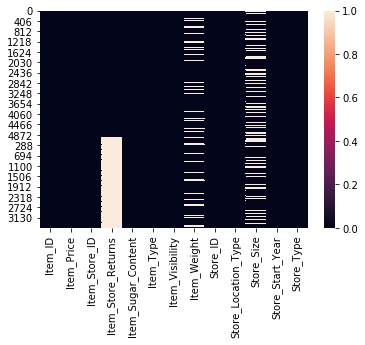

In [12]:
sns.heatmap(df.isnull())

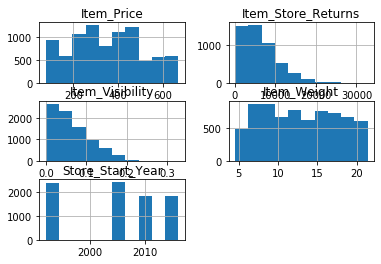

In [11]:
df.hist();

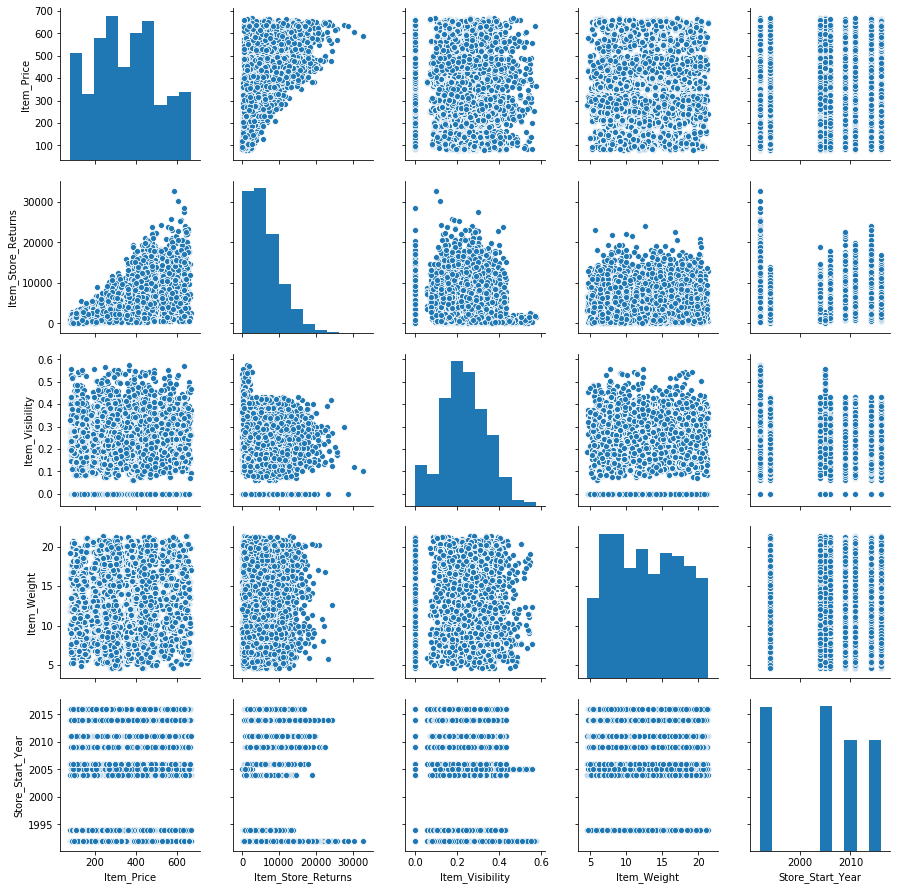

In [15]:
sns.pairplot(df)

In [13]:
df['Item_Visibility'] = np.sqrt(df['Item_Visibility'])

In [25]:
df_ = df.drop(columns=['Item_ID', 'Item_Store_ID','Item_Store_Returns'])

In [26]:
cat_cols = df_.select_dtypes(include='object').columns

In [27]:
cat_cols

Index(['Item_Sugar_Content', 'Item_Type', 'Store_ID', 'Store_Location_Type',
       'Store_Size', 'Store_Type'],
      dtype='object')

In [28]:
df_.describe()

,Item_Price,Item_Visibility,Item_Weight,Store_Start_Year
count,8522.000000,8522.000000,7059.000000,8522.000000
mean,352.471687,0.233711,12.857115,2004.831847
std,155.693760,0.107307,4.643572,8.372251
min,78.230000,0.000000,4.555000,1992.000000
25%,234.542500,0.164280,8.772500,1994.000000
50%,357.450000,0.232239,12.600000,2006.000000
75%,464.130000,0.307562,16.850000,2011.000000
max,667.220000,0.573054,21.350000,2016.000000


In [47]:
df_.isnull().sum()

Item_Price                0
Item_Sugar_Content        0
Item_Type                 0
Item_Visibility           0
Item_Weight            1463
Store_ID                  0
Store_Location_Type       0
Store_Size             2409
Store_Start_Year          0
Store_Type                0
dtype: int64

In [49]:
df_['Item_Weight'].fillna(12.6, inplace=True)

In [60]:
df_['Store_Size'].fillna('Medium', inplace=True)

In [62]:
df_['Store_Size'].value_counts()

Medium    5202
Small     2388
High       932
Name: Store_Size, dtype: int64

In [63]:
df_.isnull().sum()

Item_Price             0
Item_Sugar_Content     0
Item_Type              0
Item_Visibility        0
Item_Weight            0
Store_ID               0
Store_Location_Type    0
Store_Size             0
Store_Start_Year       0
Store_Type             0
dtype: int64

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
minmax = MinMaxScaler()

In [33]:
#df_new = minmax.fit_transform(df_)

In [64]:
train_.shape, test_.shape

((4990, 13), (3532, 12))

In [71]:
sub.shape

(3532, 2)

In [65]:
df_.shape

(8522, 10)

In [66]:
X = df_[:4990]
X.shape

(4990, 10)

In [67]:
new_test = df_[4990:]
new_test.shape

(3532, 10)

In [68]:
y = train_['Item_Store_Returns']
y.shape

(4990,)

In [39]:
from catboost import CatBoostRegressor

In [40]:
cat = CatBoostRegressor(loss_function='RMSE')

In [41]:
from sklearn.model_selection import train_test_split

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [70]:
cat.fit(X_train, y_train, cat_features=cat_cols , eval_set=(X_test,y_test))

Learning rate set to 0.059857
0:	learn: 4329.2898802	test: 4261.6508346	best: 4261.6508346 (0)	total: 246ms	remaining: 4m 5s
1:	learn: 4206.2274116	test: 4145.1528254	best: 4145.1528254 (1)	total: 283ms	remaining: 2m 20s
2:	learn: 4095.9233271	test: 4033.8413351	best: 4033.8413351 (2)	total: 317ms	remaining: 1m 45s
3:	learn: 3988.7026380	test: 3931.5946875	best: 3931.5946875 (3)	total: 344ms	remaining: 1m 25s
4:	learn: 3896.9835156	test: 3843.8282886	best: 3843.8282886 (4)	total: 375ms	remaining: 1m 14s
5:	learn: 3807.6013762	test: 3759.6454295	best: 3759.6454295 (5)	total: 395ms	remaining: 1m 5s
6:	learn: 3728.2721680	test: 3683.9879959	best: 3683.9879959 (6)	total: 426ms	remaining: 1m
7:	learn: 3649.0515875	test: 3610.3203747	best: 3610.3203747 (7)	total: 471ms	remaining: 58.4s
8:	learn: 3580.0783404	test: 3547.1622400	best: 3547.1622400 (8)	total: 599ms	remaining: 1m 5s
9:	learn: 3519.3805040	test: 3493.3425306	best: 3493.3425306 (9)	total: 681ms	remaining: 1m 7s
10:	learn: 3466.071

91:	learn: 2868.3145064	test: 2962.2411481	best: 2962.2411481 (91)	total: 3.15s	remaining: 31.1s
92:	learn: 2867.2684655	test: 2961.9493294	best: 2961.9493294 (92)	total: 3.2s	remaining: 31.2s
93:	learn: 2866.3486328	test: 2961.4596512	best: 2961.4596512 (93)	total: 3.24s	remaining: 31.3s
94:	learn: 2865.0504944	test: 2961.6930985	best: 2961.4596512 (93)	total: 3.27s	remaining: 31.2s
95:	learn: 2864.0124285	test: 2961.8862110	best: 2961.4596512 (93)	total: 3.31s	remaining: 31.1s
96:	learn: 2862.8695450	test: 2961.4230783	best: 2961.4230783 (96)	total: 3.33s	remaining: 31s
97:	learn: 2862.2879354	test: 2961.0876341	best: 2961.0876341 (97)	total: 3.38s	remaining: 31.1s
98:	learn: 2861.2879907	test: 2961.1957894	best: 2961.0876341 (97)	total: 3.41s	remaining: 31s
99:	learn: 2860.2298231	test: 2961.0880615	best: 2961.0876341 (97)	total: 3.44s	remaining: 31s
100:	learn: 2858.0103006	test: 2961.1329339	best: 2961.0876341 (97)	total: 3.48s	remaining: 31s
101:	learn: 2857.2664644	test: 2960.91

175:	learn: 2784.3725684	test: 2955.8119766	best: 2954.3153186 (174)	total: 5.85s	remaining: 27.4s
176:	learn: 2783.3350873	test: 2955.3746997	best: 2954.3153186 (174)	total: 5.88s	remaining: 27.3s
177:	learn: 2783.1282955	test: 2955.3570927	best: 2954.3153186 (174)	total: 5.92s	remaining: 27.3s
178:	learn: 2782.5237675	test: 2955.4525693	best: 2954.3153186 (174)	total: 5.95s	remaining: 27.3s
179:	learn: 2779.6434055	test: 2957.2278069	best: 2954.3153186 (174)	total: 5.99s	remaining: 27.3s
180:	learn: 2779.2773375	test: 2957.2234458	best: 2954.3153186 (174)	total: 6.01s	remaining: 27.2s
181:	learn: 2779.1381250	test: 2957.2601441	best: 2954.3153186 (174)	total: 6.03s	remaining: 27.1s
182:	learn: 2778.9514514	test: 2957.2273507	best: 2954.3153186 (174)	total: 6.05s	remaining: 27s
183:	learn: 2777.8115950	test: 2956.2474004	best: 2954.3153186 (174)	total: 6.1s	remaining: 27s
184:	learn: 2777.1915310	test: 2956.3932632	best: 2954.3153186 (174)	total: 6.15s	remaining: 27.1s
185:	learn: 277

260:	learn: 2706.7051587	test: 2964.2959030	best: 2954.3153186 (174)	total: 8.82s	remaining: 25s
261:	learn: 2705.6603426	test: 2965.7013102	best: 2954.3153186 (174)	total: 8.85s	remaining: 24.9s
262:	learn: 2705.2967394	test: 2965.2633091	best: 2954.3153186 (174)	total: 8.89s	remaining: 24.9s
263:	learn: 2704.6751249	test: 2965.7388394	best: 2954.3153186 (174)	total: 8.93s	remaining: 24.9s
264:	learn: 2703.4891859	test: 2965.6884422	best: 2954.3153186 (174)	total: 8.96s	remaining: 24.9s
265:	learn: 2702.9569954	test: 2965.7996559	best: 2954.3153186 (174)	total: 8.99s	remaining: 24.8s
266:	learn: 2702.0582667	test: 2965.4142167	best: 2954.3153186 (174)	total: 9.02s	remaining: 24.8s
267:	learn: 2701.3234295	test: 2965.9395130	best: 2954.3153186 (174)	total: 9.06s	remaining: 24.7s
268:	learn: 2700.6746235	test: 2966.0855563	best: 2954.3153186 (174)	total: 9.09s	remaining: 24.7s
269:	learn: 2700.3917113	test: 2966.1513213	best: 2954.3153186 (174)	total: 9.12s	remaining: 24.7s
270:	learn: 

345:	learn: 2635.7353141	test: 2974.3623165	best: 2954.3153186 (174)	total: 11.7s	remaining: 22.2s
346:	learn: 2634.9836372	test: 2974.0719584	best: 2954.3153186 (174)	total: 11.8s	remaining: 22.1s
347:	learn: 2632.3417827	test: 2975.9317409	best: 2954.3153186 (174)	total: 11.8s	remaining: 22.1s
348:	learn: 2631.3905740	test: 2976.5282349	best: 2954.3153186 (174)	total: 11.8s	remaining: 22.1s
349:	learn: 2629.8423437	test: 2977.1148265	best: 2954.3153186 (174)	total: 11.9s	remaining: 22s
350:	learn: 2629.6848430	test: 2977.1087703	best: 2954.3153186 (174)	total: 11.9s	remaining: 22s
351:	learn: 2628.6386874	test: 2977.1520365	best: 2954.3153186 (174)	total: 11.9s	remaining: 22s
352:	learn: 2628.1756595	test: 2977.4134335	best: 2954.3153186 (174)	total: 12s	remaining: 22s
353:	learn: 2627.7570268	test: 2977.4851397	best: 2954.3153186 (174)	total: 12s	remaining: 21.9s
354:	learn: 2626.0954221	test: 2976.9242153	best: 2954.3153186 (174)	total: 12s	remaining: 21.9s
355:	learn: 2625.2761300

431:	learn: 2565.5529402	test: 2982.0112413	best: 2954.3153186 (174)	total: 14.7s	remaining: 19.3s
432:	learn: 2565.0460111	test: 2981.9921831	best: 2954.3153186 (174)	total: 14.8s	remaining: 19.3s
433:	learn: 2564.9402763	test: 2981.9270419	best: 2954.3153186 (174)	total: 14.8s	remaining: 19.3s
434:	learn: 2564.8919818	test: 2981.7227664	best: 2954.3153186 (174)	total: 14.8s	remaining: 19.2s
435:	learn: 2564.4949772	test: 2981.7750874	best: 2954.3153186 (174)	total: 14.8s	remaining: 19.2s
436:	learn: 2563.5055377	test: 2982.2664120	best: 2954.3153186 (174)	total: 14.9s	remaining: 19.2s
437:	learn: 2563.3374678	test: 2982.1386189	best: 2954.3153186 (174)	total: 14.9s	remaining: 19.1s
438:	learn: 2562.5643910	test: 2982.7699931	best: 2954.3153186 (174)	total: 14.9s	remaining: 19.1s
439:	learn: 2562.4065575	test: 2982.6198822	best: 2954.3153186 (174)	total: 15s	remaining: 19s
440:	learn: 2562.0966604	test: 2982.7580283	best: 2954.3153186 (174)	total: 15s	remaining: 19s
441:	learn: 2561.4

515:	learn: 2504.5597723	test: 2990.1013784	best: 2954.3153186 (174)	total: 17.6s	remaining: 16.5s
516:	learn: 2503.6150516	test: 2990.2567789	best: 2954.3153186 (174)	total: 17.7s	remaining: 16.5s
517:	learn: 2502.6483133	test: 2990.3845518	best: 2954.3153186 (174)	total: 17.7s	remaining: 16.5s
518:	learn: 2500.6690784	test: 2989.2811732	best: 2954.3153186 (174)	total: 17.8s	remaining: 16.5s
519:	learn: 2500.2824345	test: 2989.3198509	best: 2954.3153186 (174)	total: 17.8s	remaining: 16.4s
520:	learn: 2499.6150819	test: 2989.4001653	best: 2954.3153186 (174)	total: 17.8s	remaining: 16.4s
521:	learn: 2498.0981742	test: 2989.5994182	best: 2954.3153186 (174)	total: 17.9s	remaining: 16.4s
522:	learn: 2497.4595440	test: 2988.4516519	best: 2954.3153186 (174)	total: 17.9s	remaining: 16.3s
523:	learn: 2497.1243714	test: 2988.4515525	best: 2954.3153186 (174)	total: 17.9s	remaining: 16.3s
524:	learn: 2496.8116939	test: 2988.7782172	best: 2954.3153186 (174)	total: 18s	remaining: 16.2s
525:	learn: 

600:	learn: 2442.0649477	test: 2987.7896679	best: 2954.3153186 (174)	total: 20.8s	remaining: 13.8s
601:	learn: 2441.2718344	test: 2988.7841629	best: 2954.3153186 (174)	total: 20.8s	remaining: 13.8s
602:	learn: 2440.8170303	test: 2988.1996552	best: 2954.3153186 (174)	total: 20.9s	remaining: 13.7s
603:	learn: 2440.6113001	test: 2987.9469776	best: 2954.3153186 (174)	total: 20.9s	remaining: 13.7s
604:	learn: 2440.2372221	test: 2987.9957486	best: 2954.3153186 (174)	total: 20.9s	remaining: 13.7s
605:	learn: 2439.2115132	test: 2987.9616763	best: 2954.3153186 (174)	total: 21s	remaining: 13.6s
606:	learn: 2438.9649687	test: 2987.9220980	best: 2954.3153186 (174)	total: 21s	remaining: 13.6s
607:	learn: 2438.4387807	test: 2988.0196632	best: 2954.3153186 (174)	total: 21s	remaining: 13.6s
608:	learn: 2437.7889281	test: 2988.0636733	best: 2954.3153186 (174)	total: 21.1s	remaining: 13.5s
609:	learn: 2436.7325086	test: 2988.6220722	best: 2954.3153186 (174)	total: 21.1s	remaining: 13.5s
610:	learn: 2435

686:	learn: 2387.8474479	test: 2989.8507252	best: 2954.3153186 (174)	total: 23.9s	remaining: 10.9s
687:	learn: 2387.6643445	test: 2990.1284923	best: 2954.3153186 (174)	total: 23.9s	remaining: 10.8s
688:	learn: 2387.4585694	test: 2990.0632024	best: 2954.3153186 (174)	total: 23.9s	remaining: 10.8s
689:	learn: 2387.0145002	test: 2990.1407094	best: 2954.3153186 (174)	total: 24s	remaining: 10.8s
690:	learn: 2386.8260242	test: 2990.2297008	best: 2954.3153186 (174)	total: 24s	remaining: 10.7s
691:	learn: 2386.2985491	test: 2989.9730867	best: 2954.3153186 (174)	total: 24s	remaining: 10.7s
692:	learn: 2385.7791120	test: 2989.9012813	best: 2954.3153186 (174)	total: 24.1s	remaining: 10.7s
693:	learn: 2385.3249810	test: 2989.9443423	best: 2954.3153186 (174)	total: 24.1s	remaining: 10.6s
694:	learn: 2384.9389273	test: 2990.3027971	best: 2954.3153186 (174)	total: 24.1s	remaining: 10.6s
695:	learn: 2384.4656744	test: 2989.8192431	best: 2954.3153186 (174)	total: 24.2s	remaining: 10.6s
696:	learn: 2384

772:	learn: 2343.5927633	test: 2994.1253125	best: 2954.3153186 (174)	total: 27s	remaining: 7.92s
773:	learn: 2343.0145914	test: 2994.5342637	best: 2954.3153186 (174)	total: 27s	remaining: 7.89s
774:	learn: 2342.6801317	test: 2994.5876688	best: 2954.3153186 (174)	total: 27.1s	remaining: 7.85s
775:	learn: 2341.9638119	test: 2994.5680649	best: 2954.3153186 (174)	total: 27.1s	remaining: 7.82s
776:	learn: 2341.3372918	test: 2994.3720729	best: 2954.3153186 (174)	total: 27.1s	remaining: 7.78s
777:	learn: 2340.7994414	test: 2994.4533490	best: 2954.3153186 (174)	total: 27.2s	remaining: 7.75s
778:	learn: 2340.1955192	test: 2994.5568169	best: 2954.3153186 (174)	total: 27.2s	remaining: 7.72s
779:	learn: 2339.3206115	test: 2994.0941723	best: 2954.3153186 (174)	total: 27.2s	remaining: 7.68s
780:	learn: 2338.9008549	test: 2993.9994643	best: 2954.3153186 (174)	total: 27.2s	remaining: 7.64s
781:	learn: 2338.4949416	test: 2993.7955756	best: 2954.3153186 (174)	total: 27.3s	remaining: 7.61s
782:	learn: 23

858:	learn: 2291.9265143	test: 3000.0911238	best: 2954.3153186 (174)	total: 30.1s	remaining: 4.94s
859:	learn: 2291.1357592	test: 2999.9104912	best: 2954.3153186 (174)	total: 30.2s	remaining: 4.91s
860:	learn: 2290.9536180	test: 2999.8043449	best: 2954.3153186 (174)	total: 30.2s	remaining: 4.87s
861:	learn: 2290.7800155	test: 2999.7643669	best: 2954.3153186 (174)	total: 30.2s	remaining: 4.84s
862:	learn: 2290.6116665	test: 2999.6776712	best: 2954.3153186 (174)	total: 30.3s	remaining: 4.8s
863:	learn: 2289.9889770	test: 2999.7526520	best: 2954.3153186 (174)	total: 30.3s	remaining: 4.76s
864:	learn: 2288.7962529	test: 3000.9391257	best: 2954.3153186 (174)	total: 30.3s	remaining: 4.73s
865:	learn: 2288.0384793	test: 3001.3967600	best: 2954.3153186 (174)	total: 30.4s	remaining: 4.7s
866:	learn: 2287.5827748	test: 3001.4827100	best: 2954.3153186 (174)	total: 30.4s	remaining: 4.66s
867:	learn: 2286.8773775	test: 3001.1374288	best: 2954.3153186 (174)	total: 30.4s	remaining: 4.63s
868:	learn: 

947:	learn: 2243.5378592	test: 3008.9714016	best: 2954.3153186 (174)	total: 33.2s	remaining: 1.82s
948:	learn: 2243.0998686	test: 3008.8394711	best: 2954.3153186 (174)	total: 33.3s	remaining: 1.79s
949:	learn: 2242.6256404	test: 3008.3687637	best: 2954.3153186 (174)	total: 33.3s	remaining: 1.75s
950:	learn: 2242.2591819	test: 3008.4111419	best: 2954.3153186 (174)	total: 33.3s	remaining: 1.72s
951:	learn: 2241.9178316	test: 3008.6680122	best: 2954.3153186 (174)	total: 33.4s	remaining: 1.68s
952:	learn: 2241.2230201	test: 3009.1325087	best: 2954.3153186 (174)	total: 33.4s	remaining: 1.65s
953:	learn: 2240.6693497	test: 3009.1378692	best: 2954.3153186 (174)	total: 33.4s	remaining: 1.61s
954:	learn: 2239.8701805	test: 3009.1503662	best: 2954.3153186 (174)	total: 33.5s	remaining: 1.58s
955:	learn: 2239.4367123	test: 3009.1483957	best: 2954.3153186 (174)	total: 33.5s	remaining: 1.54s
956:	learn: 2239.2098965	test: 3009.1927118	best: 2954.3153186 (174)	total: 33.5s	remaining: 1.51s
957:	learn

In [72]:
pred = pd.DataFrame(cat.predict(new_test))


In [74]:
sub_['Item_Store_Returns']= pred

In [75]:
sub_.head()

,Item_Store_ID,Item_Store_Returns
0,DRA59_BABATUNJI010,2130.693763
1,DRA59_BABATUNJI013,7543.526048
2,DRB01_BABATUNJI013,7551.693046
3,DRB13_BABATUNJI010,2187.913934
4,DRB13_BABATUNJI013,7695.186016


In [77]:
sub_.to_csv('Submission.csv', index=False)